# Exercises

## Norms, min, max, etc. (exercise on writing functions)

Write a function to perform each of the following computations

 1. Given array, find index and minimum value: `imin, xmin = min(x)`
 1. Compute $L^1$ norm of an array
 1. Compute $L^2$ norm of an array
 1. Compute $L^\infty$ norm of an array
 1. Return an array which is element-wise minimum of two arrays
 1. Compute matrix-vector product
 1. Add two given matrices
 1. Multiply two given matrices
 
 Test your functions with some random inputs and using in built functions. Where needed, put checks on the consistency of input arguments.

## Solve an ODE

$\newcommand{\ud}{\mathrm{d}}$
$\newcommand{\od}[2]{\frac{\ud #1}{\ud #2}}$

Consider the ODE
$$
\od{u}{t} = f(u,t), \qquad u(0) = u_0, \qquad t \in [0,T]
$$
Choose a step size $\Delta t$ and define the time levels
$$
t_n = n \Delta t, \qquad n=0,1,2,\ldots
$$
Let $v_n$ be a numerical approximation to the true solution
$$
v_n \approx u(t_n)
$$

Consider these two methods.

**Forward Euler method**
$$
v_{n+1} = v_n + \Delta t f(v_n, t_n) 
$$

**Heun's method**
\begin{eqnarray*}
v^{(1)} &=& v_n + \Delta t f(v_n, t_n) \\
v_{n+1} &=& v_n + \frac{\Delta t}{2} [f(v_n, t_n) + f(v^{(1)}, t_{n+1})]
\end{eqnarray*}

**Backward Euler method**
$$
v_{n+1} = v_n + \Delta t f(v_{n+1}, t_{n+1}) 
$$

**Crank-Nicholson method**
$$
v_{n+1} = v_n + \frac{\Delta t}{2} [f(v_n, t_n) + f(v_{n+1}, t_{n+1})]
$$

Consider the problem
$$
\od{u}{t} = u, \qquad u(0) = 1, \qquad t \in [0,1]
$$
whose exact solution is
$$
u(t) = \exp(t)
$$

 1. Write code to implement the above methods.
 1. Obtain the numerical solution for different values of step size:
 $$
 \Delta t \in \left\{ \frac{0.1}{2^m} : m = 0,1,2,3,4 \right\}
 $$
 and plot them on a figure along with exact solution. Make one plot for each method.
 1. Compute the error $E(\Delta t)$ in the numerical solution at final time $T=1$, which depends on $\Delta t$.
 1. Plot $E(\Delta t)$ vs $\Delta t$ in loglog scale, which should look like a straight line, suggesting that
 $$
 E(\Delta t) = C \Delta t^p, \qquad p > 0
 $$
 Estimate the value of $C$ and $p$. Plot the error curve for each method on the same figure so you can compare the accuracy of different methods.
 
**Hint:** For each method, implement a function of the form
```
# Input arguments:
#    f  = right hand side function
#    u0 = initial condition
#    t0 = initial time
#    dt = time step
#    T  = final time
# Output:
#    t  = array of time values
#    u  = array of solution values
def solve_forward_euler(f, u0, t0, dt, T):
    # perform computations
    return t, u
```

## Sample solution

In [11]:
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt

Right hand side function and exact solution.

In [12]:
# Right hand side function
def f(u,t):
    return u

# Exact solution
def uexact(t):
    return np.exp(t)

## Forward Euler

Forward euler method, the equations already given above.

In [13]:
def solve_forward_euler(f, u0, t0, dt, T):
    n = int(T/dt) + 1
    if n*dt - T < -1e-12: # If n*dt < T, but put some tolerance
        n = n + 1
    t, u = np.zeros(n), np.zeros(n)
    t[0] = t0
    u[0] = u0
    i    = 0
    while np.abs(t[i] - T) > 1e-12: # need some tolerance due to roundoff error
        if t[i] + dt > T: # Adjust dt to exactly reach T
            dt = T - t[i]
        u[i+1] = u[i] + dt * f(u[i],t[i])
        t[i+1] = t[i] + dt
        i = i + 1
    return t, u

Test for one value of $\Delta t$

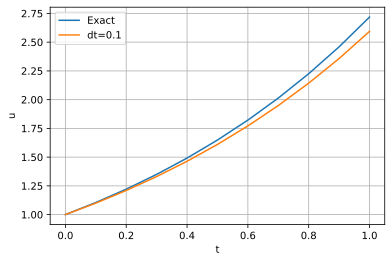

In [14]:
u0 = 1.0
t0 = 0.0
dt = 0.1
T  = 1.0
t, u = solve_forward_euler(f, u0, t0, dt, T)
ue = uexact(t)
plt.plot(t, ue, label="Exact")
plt.plot(t, u, label="dt="+str(dt))
plt.xlabel("t"); plt.ylabel("u"); plt.grid(True)
plt.legend();

Now, implement solve functions for other methods. You can use the `estimate` function for all other methods to compute the convergence rate.

## Heun's method

The equations are already written above and we implement them in the next function.

## Backward Euler

This method is implicit, so we need to write the update equation first.
$$
v_{n+1} = v_n + \Delta t f(v_{n+1},t_{n+1}) = v_n + \Delta t \ v_{n+1}
$$
so that
$$
v_{n+1} = \frac{v_n}{1 - \Delta t}
$$
Now we can implement this.

## Crank-Nicholson method

This method is implicit, so we need to write the update equation first.
$$
v_{n+1} = v_n + \frac{1}{2}\Delta t ( v_n + v_{n+1} )
$$
so that
$$
v_{n+1} = \frac{1 + \Delta t}{1 - \Delta t} v_n
$$
Now we can implement this.

## Compute errors

Now we run for different values of $\Delta t$, plot solution and compute error.

In [15]:
def compute_errors(method):
    if method == "fe":
        solve = solve_forward_euler
        title = "Forward Euler"
    else:
        print("Method not implemented")
        return
    
    dts = 0.1 / 2**np.arange(0,5) # array dt values
    err = np.empty_like(dts)      # array of corresponding errors
    plt.figure(figsize=(6,8))
    for i,dt in enumerate(dts):
        t, u = solve(f, u0, t0, dt, T)
        ue   = uexact(t)
        err[i] = np.abs(u[-1] - ue[-1]) # error at final time
        plt.subplot(211)
        plt.plot(t, u, label="dt = "+str(dt))
        plt.subplot(212)
        plt.plot(t, u-ue, label="dt = "+str(dt))

    plt.subplot(211)
    plt.plot(t, uexact(t), label="Exact")
    plt.xlabel("t"); plt.ylabel("u"); plt.grid(True)
    plt.title(title)
    plt.legend();

    plt.subplot(212)
    plt.xlabel("t"); plt.ylabel("$u - u_{exact}$"); plt.grid(True)
    plt.title(title)
    plt.legend();
    
    return dts, err

Now run different methods on different values of $\Delta t$.

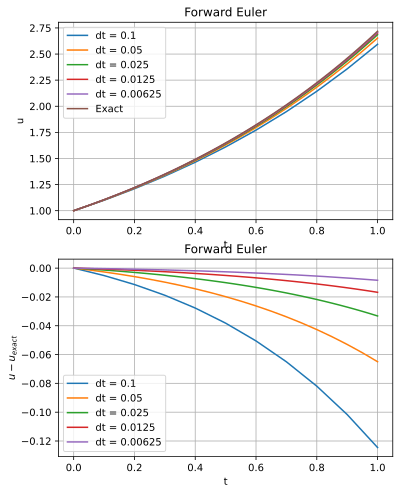

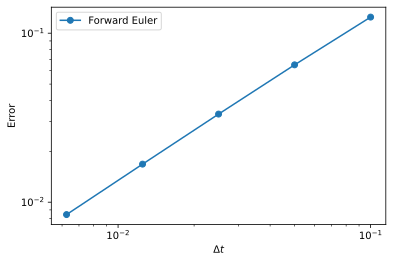

In [16]:
dt1, err1 = compute_errors("fe")

plt.figure()
plt.loglog(dt1, err1, 'o-',label="Forward Euler")
plt.legend()
plt.xlabel("$\Delta t$")
plt.ylabel("Error");

## Compute convergence rates

Now write a function to estimate the convergence rate of the error.
$$
E = C \Delta t^p, \qquad \log E =  p \log \Delta t + \log C
$$
We use `polyfit` to fit a function to the data $(x,y) = (\log \Delta t, \log E)$
$$
y = c_0 x + c_1
$$
so that
$$
p = c_0, \qquad C = \exp(c_1)
$$

In [17]:
def estimate(dt, err):
    c = np.polyfit(np.log(dt), np.log(err), deg=1)
    print("p = ", c[0])
    print("C = ", np.exp(c[1]))

Use this function on the error values obtained with forward Euler method.

In [18]:
print("Forward Euler")
estimate(dt1,err1)

Forward Euler
p =  0.9716186825426257
C =  1.18268052439662
